In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, RepeatVector, TimeDistributed
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
prom_file_path = "/home/wenjun/integrated_r11n5.parquet"

In [24]:
data = pd.read_parquet(prom_file_path)

In [25]:
data.head()

,id,timestamp,node,node_time_seconds,node_load15,surfsara_power_usage,up,node_netstat_Tcp_OutSegs,node_netstat_Tcp_InErrs,node_context_switches_total,node_load5,node_load1,node_memory_Active_bytes,node_netstat_Tcp_RetransSegs,node_netstat_Udp_InErrors,node_memory_Dirty_bytes,surfsara_ambient_temp,node_netstat_Icmp_InMsgs,node_netstat_Udp_InDatagrams,node_intr_total,node_netstat_Tcp_InSegs,node_memory_Percpu_bytes,node_boot_time_seconds,node_netstat_Udp_OutDatagrams,node_netstat_Icmp_InErrors,node_procs_blocked,node_netstat_Icmp_OutMsgs,node_memory_MemFree_bytes,node_procs_running,node_forks_total,node_hwmon_temp_celsius-min,node_hwmon_temp_celsius-mean,node_hwmon_temp_celsius-max,node_filesystem_avail_bytes-sum,node_filesystem_files-sum,node_network_transmit_bytes_total-sum,node_filesystem_device_error-sum,node_disk_written_bytes_total-sum,node_filesystem_free_bytes-sum,node_thermal_zone_temp-min,node_thermal_zone_temp-mean,node_thermal_zone_temp-max,node_disk_read_bytes_total-sum,nvidia_gpu_memory_used_bytes-sum,nvidia_gpu_temperature_celsius-min,nvidia_gpu_temperature_celsius-mean,nvidia_gpu_temperature_celsius-max,node_arp_entries-sum,nvidia_gpu_fanspeed_percent-min,nvidia_gpu_fanspeed_percent-mean,nvidia_gpu_fanspeed_percent-max,node_filesystem_files_free-sum,nvidia_gpu_power_usage_milliwatts-min,nvidia_gpu_power_usage_milliwatts-sum,nvidia_gpu_power_usage_milliwatts-mean,nvidia_gpu_power_usage_milliwatts-max,node_filesystem_size_bytes-sum,node_disk_writes_completed_total-sum,nvidia_gpu_duty_cycle-min,nvidia_gpu_duty_cycle-mean,nvidia_gpu_duty_cycle-max,node_network_transmit_packets_total-sum,node_udp_queues-sum,node_network_receive_bytes_total-sum,node_network_receive_packets_total-sum,node_network_receive_multicast_total-sum,node_disk_io_now-sum,node_rapl_package_joules_total-sum,node_network_receive_drop_total-sum,jobID,TIMEOUT,COMPLETED,CANCELLED,FAILED,OUT_OF_MEMORY,NODE_FAIL,jobCount_30s,TIMEOUT_30s,COMPLETED_30s,CANCELLED_30s,FAILED_30s,OUT_OF_MEMORY_30s,NODE_FAIL_30s
1972309,10530208,2022-06-30 16:00:30,r11n5,1.656610e+09,16.08,192.0,1.0,1.001440e+11,0.0,2.568690e+11,16.04,16.0,1.712070e+10,91244200.0,0.0,16384.0,24.0,58.0,168239.0,3.867460e+10,9.525950e+10,32636900.0,1.652450e+09,305698.0,0.0,0.0,79.0,6.071650e+10,22.0,72413000.0,52.0,53.94,57.0,1.883536e+12,230697018.0,3.144533e+14,0.0,4.120699e+12,1.883589e+12,56.0,56.0,56.0,4.932662e+11,0.0,NaN,NaN,NaN,219.0,NaN,NaN,NaN,230075884.0,NaN,0.0,NaN,NaN,1.912250e+12,15312773.0,NaN,NaN,NaN,1.002357e+11,0.0,3.139361e+14,1.000439e+11,5.0,0.0,187752.55,0.0,[],0,0,0,0,0,0,0,0,0,0,0,0,0
1972589,10530209,2022-06-30 16:01:00,r11n5,1.656610e+09,16.07,192.0,1.0,1.001450e+11,0.0,2.568690e+11,16.03,16.0,1.712060e+10,91246500.0,0.0,8192.0,24.0,58.0,168239.0,3.867580e+10,9.526090e+10,32636900.0,1.652450e+09,305698.0,0.0,0.0,79.0,6.071600e+10,26.0,72413100.0,52.0,53.82,56.0,1.883536e+12,230697018.0,3.144549e+14,0.0,4.120699e+12,1.883589e+12,56.0,56.0,56.0,4.932662e+11,0.0,NaN,NaN,NaN,219.0,NaN,NaN,NaN,230075884.0,NaN,0.0,NaN,NaN,1.912250e+12,15312783.0,NaN,NaN,NaN,1.002370e+11,0.0,3.139377e+14,1.000453e+11,5.0,0.0,191318.44,0.0,[],0,0,0,0,0,0,0,0,0,0,0,0,0
1972869,10530210,2022-06-30 16:01:30,r11n5,1.656610e+09,16.07,192.0,1.0,1.001460e+11,0.0,2.568690e+11,16.03,16.0,1.712060e+10,91249000.0,0.0,12288.0,24.0,58.0,168239.0,3.867700e+10,9.526230e+10,32636900.0,1.652450e+09,305698.0,0.0,0.0,79.0,6.071600e+10,18.0,72413100.0,52.0,54.24,58.0,1.883536e+12,230697018.0,3.144564e+14,0.0,4.120699e+12,1.883589e+12,56.0,56.0,56.0,4.932662e+11,0.0,NaN,NaN,NaN,219.0,NaN,NaN,NaN,230075884.0,NaN,0.0,NaN,NaN,1.912250e+12,15312788.0,NaN,NaN,NaN,1.002383e+11,0.0,3.139393e+14,1.000467e+11,5.0,0.0,194886.42,0.0,[],0,0,0,0,0,0,0,0,0,0,0,0,0
1973149,10530211,2022-06-30 16:02:00,r11n5,1.656610e+09,16.07,192.0,1.0,1.001480e+11,0.0,2.568690e+11,16.03,16.0,1.712060e+10,91251100.0,0.0,8192.0,24.0,58.0,168239.0,3.867830e+10,9.526360e+10,32636900.0,1.652450e+09,305698.0,0.0,0.0,79.0,6.071640e+10,19.0,72413100.0,

In [26]:
data.columns

Index(['id', 'timestamp', 'node', 'node_time_seconds', 'node_load15',
       'surfsara_power_usage', 'up', 'node_netstat_Tcp_OutSegs',
       'node_netstat_Tcp_InErrs', 'node_context_switches_total', 'node_load5',
       'node_load1', 'node_memory_Active_bytes',
       'node_netstat_Tcp_RetransSegs', 'node_netstat_Udp_InErrors',
       'node_memory_Dirty_bytes', 'surfsara_ambient_temp',
       'node_netstat_Icmp_InMsgs', 'node_netstat_Udp_InDatagrams',
       'node_intr_total', 'node_netstat_Tcp_InSegs',
       'node_memory_Percpu_bytes', 'node_boot_time_seconds',
       'node_netstat_Udp_OutDatagrams', 'node_netstat_Icmp_InErrors',
       'node_procs_blocked', 'node_netstat_Icmp_OutMsgs',
       'node_memory_MemFree_bytes', 'node_procs_running', 'node_forks_total',
       'node_hwmon_temp_celsius-min', 'node_hwmon_temp_celsius-mean',
       'node_hwmon_temp_celsius-max', 'node_filesystem_avail_bytes-sum',
       'node_filesystem_files-sum', 'node_network_transmit_bytes_total-sum',
   

In [27]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [28]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [29]:
# Assuming 'data' is your numpy array and 'column_names' is your list of column names
column_names = ['id', 'timestamp', 'node', 'node_time_seconds', 'node_load15',
       'surfsara_power_usage', 'up', 'node_netstat_Tcp_OutSegs',
       'node_netstat_Tcp_InErrs', 'node_context_switches_total', 'node_load5',
       'node_load1', 'node_memory_Active_bytes',
       'node_netstat_Tcp_RetransSegs', 'node_netstat_Udp_InErrors',
       'node_memory_Dirty_bytes', 'surfsara_ambient_temp',
       'node_netstat_Icmp_InMsgs', 'node_netstat_Udp_InDatagrams',
       'node_intr_total', 'node_netstat_Tcp_InSegs',
       'node_memory_Percpu_bytes', 'node_boot_time_seconds',
       'node_netstat_Udp_OutDatagrams', 'node_netstat_Icmp_InErrors',
       'node_procs_blocked', 'node_netstat_Icmp_OutMsgs',
       'node_memory_MemFree_bytes', 'node_procs_running', 'node_forks_total',
       'node_hwmon_temp_celsius-min', 'node_hwmon_temp_celsius-mean',
       'node_hwmon_temp_celsius-max', 'node_filesystem_avail_bytes-sum',
       'node_filesystem_files-sum', 'node_network_transmit_bytes_total-sum',
       'node_filesystem_device_error-sum', 'node_disk_written_bytes_total-sum',
       'node_filesystem_free_bytes-sum', 'node_thermal_zone_temp-min',
       'node_thermal_zone_temp-mean', 'node_thermal_zone_temp-max',
       'node_disk_read_bytes_total-sum', 'nvidia_gpu_memory_used_bytes-sum',
       'nvidia_gpu_temperature_celsius-min',
       'nvidia_gpu_temperature_celsius-mean',
       'nvidia_gpu_temperature_celsius-max', 'node_arp_entries-sum',
       'nvidia_gpu_fanspeed_percent-min', 'nvidia_gpu_fanspeed_percent-mean',
       'nvidia_gpu_fanspeed_percent-max', 'node_filesystem_files_free-sum',
       'nvidia_gpu_power_usage_milliwatts-min',
       'nvidia_gpu_power_usage_milliwatts-sum',
       'nvidia_gpu_power_usage_milliwatts-mean',
       'nvidia_gpu_power_usage_milliwatts-max',
       'node_filesystem_size_bytes-sum',
       'node_disk_writes_completed_total-sum', 'nvidia_gpu_duty_cycle-min',
       'nvidia_gpu_duty_cycle-mean', 'nvidia_gpu_duty_cycle-max',
       'node_network_transmit_packets_total-sum', 'node_udp_queues-sum',
       'node_network_receive_bytes_total-sum',
       'node_network_receive_packets_total-sum',
       'node_network_receive_multicast_total-sum', 'node_disk_io_now-sum',
       'node_rapl_package_joules_total-sum',
       'node_network_receive_drop_total-sum', 'jobID', 'TIMEOUT', 'COMPLETED',
       'CANCELLED', 'FAILED', 'OUT_OF_MEMORY', 'NODE_FAIL', 'jobCount_30s',
       'TIMEOUT_30s', 'COMPLETED_30s', 'CANCELLED_30s', 'FAILED_30s',
       'OUT_OF_MEMORY_30s', 'NODE_FAIL_30s']  
df = pd.DataFrame(data, columns=column_names)

In [30]:
column = ['node_netstat_Tcp_OutSegs','node_netstat_Tcp_RetransSegs','node_intr_total','node_netstat_Tcp_InSegs','node_procs_running','node_hwmon_temp_celsius-mean','node_network_transmit_bytes_total-sum','node_thermal_zone_temp-mean','node_arp_entries-sum','node_network_transmit_packets_total-sum','node_network_receive_bytes_total-sum','node_network_receive_packets_total-sum']
X = df[column]
y = df['node_load1']

Epoch 1/20
2127/2127 [==============================] - 11s 5ms/step - loss: 2.9353e-04
Epoch 2/20
2127/2127 [==============================] - 10s 5ms/step - loss: 1.1788e-04
Epoch 3/20
2127/2127 [==============================] - 10s 5ms/step - loss: 1.0084e-04
Epoch 4/20
2127/2127 [==============================] - 10s 5ms/step - loss: 9.2917e-05
Epoch 5/20
2127/2127 [==============================] - 10s 5ms/step - loss: 8.7643e-05
Epoch 6/20
2127/2127 [==============================] - 10s 5ms/step - loss: 8.0468e-05
Epoch 7/20
2127/2127 [==============================] - 10s 5ms/step - loss: 7.5601e-05
Epoch 8/20
2127/2127 [==============================] - 10s 5ms/step - loss: 7.3202e-05
Epoch 9/20
2127/2127 [==============================] - 10s 5ms/step - loss: 6.8455e-05
Epoch 10/20
2127/2127 [==============================] - 10s 5ms/step - loss: 6.7360e-05
Epoch 11/20
2127/2127 [==============================] - 10s 5ms/step - loss: 6.2400e-05
Epoch 12/20
2127/2127 [=======

/tmp/ipykernel_634322/2129644519.py:82: RuntimeWarning: divide by zero encountered in divide
  re = np.mean(np.abs((y_test_orig - y_pred_orig) / y_test_orig))


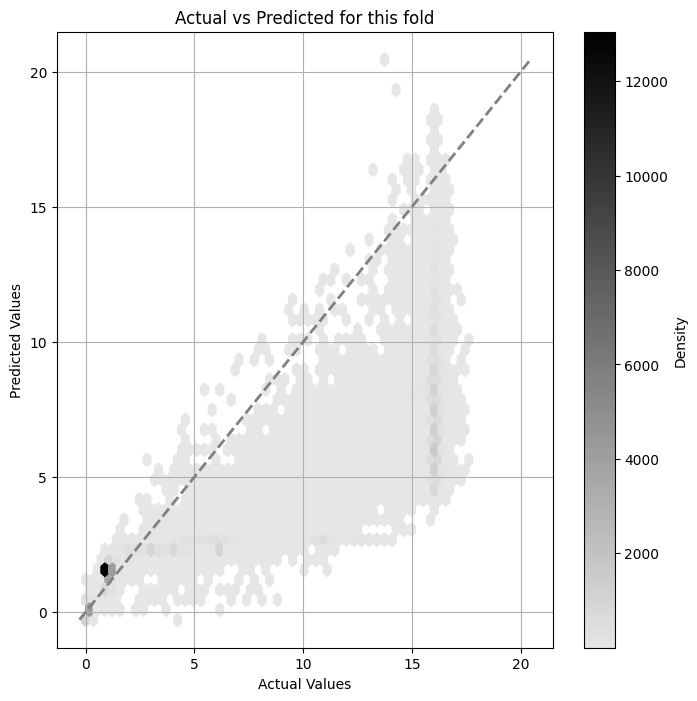

Epoch 1/20
4253/4253 [==============================] - 22s 5ms/step - loss: 1.3174e-04
Epoch 2/20
4253/4253 [==============================] - 21s 5ms/step - loss: 6.9060e-05
Epoch 3/20
4253/4253 [==============================] - 21s 5ms/step - loss: 5.9289e-05
Epoch 4/20
4253/4253 [==============================] - 21s 5ms/step - loss: 5.7273e-05
Epoch 5/20
4253/4253 [==============================] - 21s 5ms/step - loss: 5.2639e-05
Epoch 6/20
4253/4253 [==============================] - 21s 5ms/step - loss: 4.8814e-05
Epoch 7/20
4253/4253 [==============================] - 21s 5ms/step - loss: 4.5452e-05
Epoch 8/20
4253/4253 [==============================] - 21s 5ms/step - loss: 4.2184e-05
Epoch 9/20
4253/4253 [==============================] - 21s 5ms/step - loss: 3.9366e-05
Epoch 10/20
4253/4253 [==============================] - 21s 5ms/step - loss: 3.9557e-05
Epoch 11/20
4253/4253 [==============================] - 21s 5ms/step - loss: 3.6895e-05
Epoch 12/20
4253/4253 [=======

/tmp/ipykernel_634322/2129644519.py:82: RuntimeWarning: divide by zero encountered in divide
  re = np.mean(np.abs((y_test_orig - y_pred_orig) / y_test_orig))


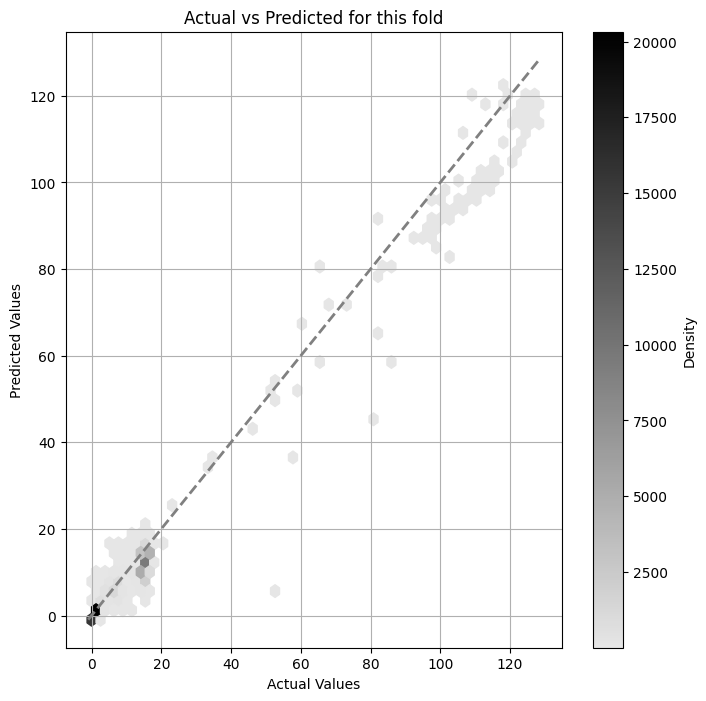

Epoch 1/20
6379/6379 [==============================] - 27s 4ms/step - loss: 9.7816e-05
Epoch 2/20
6379/6379 [==============================] - 27s 4ms/step - loss: 5.5649e-05
Epoch 3/20
6379/6379 [==============================] - 27s 4ms/step - loss: 4.9037e-05
Epoch 4/20
6379/6379 [==============================] - 27s 4ms/step - loss: 4.4333e-05
Epoch 5/20
6379/6379 [==============================] - 27s 4ms/step - loss: 4.1088e-05
Epoch 6/20
6379/6379 [==============================] - 27s 4ms/step - loss: 3.8150e-05
Epoch 7/20
6379/6379 [==============================] - 27s 4ms/step - loss: 3.6167e-05
Epoch 8/20
6379/6379 [==============================] - 27s 4ms/step - loss: 3.6727e-05
Epoch 9/20
6379/6379 [==============================] - 27s 4ms/step - loss: 3.3504e-05
Epoch 10/20
6379/6379 [==============================] - 27s 4ms/step - loss: 3.3228e-05
Epoch 11/20
6379/6379 [==============================] - 27s 4ms/step - loss: 3.3058e-05
Epoch 12/20
6379/6379 [=======

/tmp/ipykernel_634322/2129644519.py:82: RuntimeWarning: divide by zero encountered in divide
  re = np.mean(np.abs((y_test_orig - y_pred_orig) / y_test_orig))


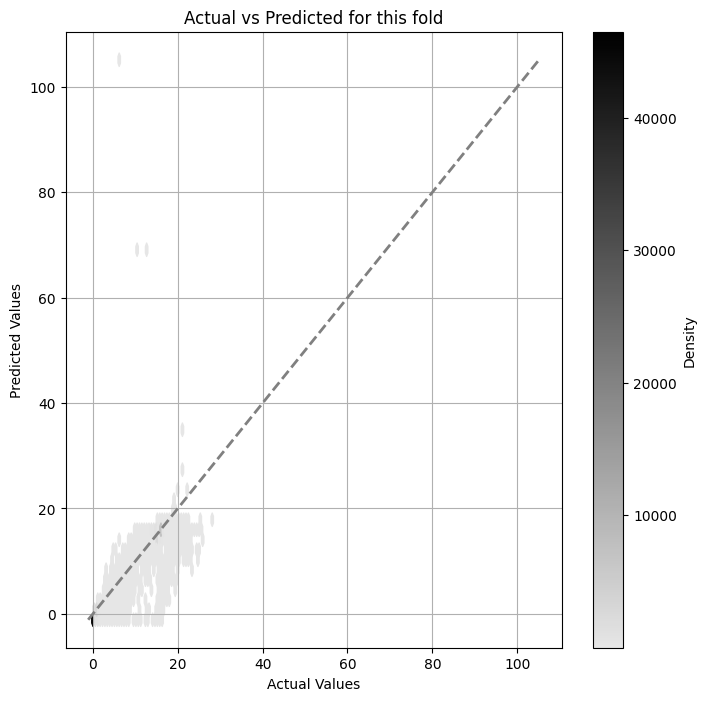

Epoch 1/20
8506/8506 [==============================] - 42s 5ms/step - loss: 7.9464e-05
Epoch 2/20
8506/8506 [==============================] - 41s 5ms/step - loss: 4.8043e-05
Epoch 3/20
8506/8506 [==============================] - 41s 5ms/step - loss: 4.1551e-05
Epoch 4/20
8506/8506 [==============================] - 41s 5ms/step - loss: 3.5462e-05
Epoch 5/20
8506/8506 [==============================] - 41s 5ms/step - loss: 3.3500e-05
Epoch 6/20
8506/8506 [==============================] - 41s 5ms/step - loss: 3.1742e-05
Epoch 7/20
8506/8506 [==============================] - 41s 5ms/step - loss: 3.0132e-05
Epoch 8/20
8506/8506 [==============================] - 41s 5ms/step - loss: 2.8926e-05
Epoch 9/20
8506/8506 [==============================] - 41s 5ms/step - loss: 2.8209e-05
Epoch 10/20
8506/8506 [==============================] - 41s 5ms/step - loss: 2.7692e-05
Epoch 11/20
8506/8506 [==============================] - 41s 5ms/step - loss: 2.7143e-05
Epoch 12/20
8506/8506 [=======

/tmp/ipykernel_634322/2129644519.py:82: RuntimeWarning: divide by zero encountered in divide
  re = np.mean(np.abs((y_test_orig - y_pred_orig) / y_test_orig))


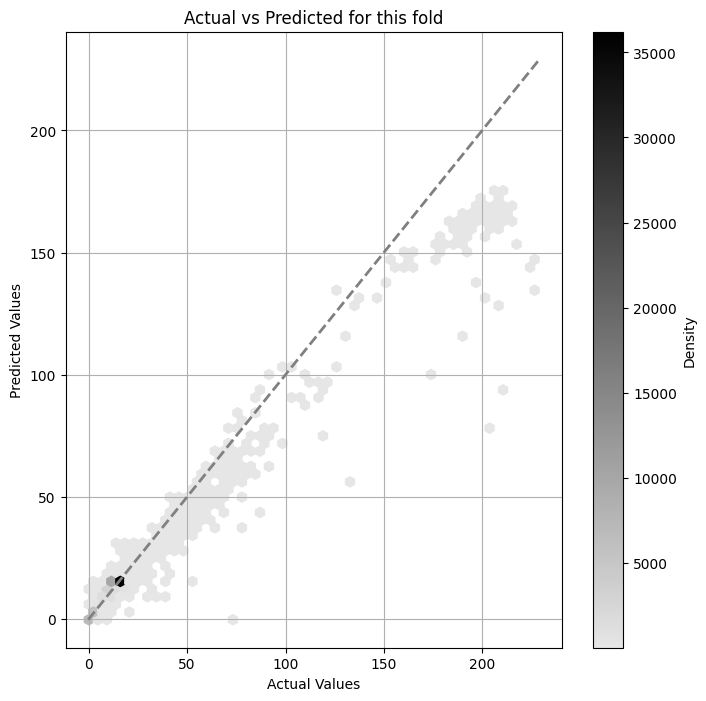

Epoch 1/20
10632/10632 [==============================] - 54s 5ms/step - loss: 8.3198e-05
Epoch 2/20
10632/10632 [==============================] - 53s 5ms/step - loss: 4.7230e-05
Epoch 3/20
10632/10632 [==============================] - 53s 5ms/step - loss: 4.2569e-05
Epoch 4/20
10632/10632 [==============================] - 53s 5ms/step - loss: 3.7732e-05
Epoch 5/20
10632/10632 [==============================] - 53s 5ms/step - loss: 3.5313e-05
Epoch 6/20
10632/10632 [==============================] - 53s 5ms/step - loss: 3.3717e-05
Epoch 7/20
10632/10632 [==============================] - 53s 5ms/step - loss: 3.1698e-05
Epoch 8/20
10632/10632 [==============================] - 53s 5ms/step - loss: 3.1070e-05
Epoch 9/20
10632/10632 [==============================] - 53s 5ms/step - loss: 2.8936e-05
Epoch 10/20
10632/10632 [==============================] - 53s 5ms/step - loss: 2.9208e-05
Epoch 11/20
10632/10632 [==============================] - 53s 5ms/step - loss: 2.8267e-05
Epoch 12

/tmp/ipykernel_634322/2129644519.py:82: RuntimeWarning: divide by zero encountered in divide
  re = np.mean(np.abs((y_test_orig - y_pred_orig) / y_test_orig))


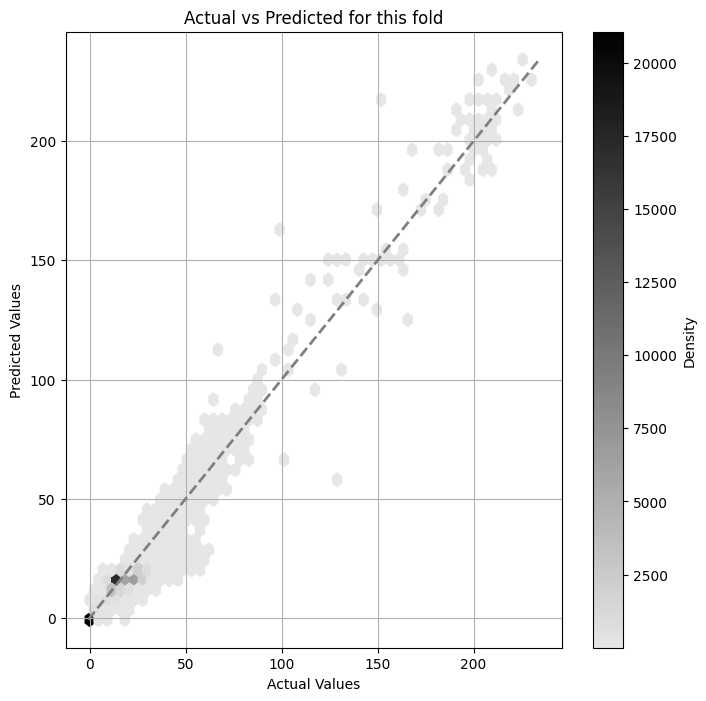

Mean RMSE over all splits:  3.1428895411053714
Mean RE over all splits:  inf


In [31]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.colors as mcolors


# Assuming `X` and `y` are your data where X is a 2D numpy array with multiple features and y is a 1D array

# Normalize your data
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X = scaler_x.fit_transform(X)
y = scaler_y.fit_transform(y.values.reshape(-1, 1)) # Reshape y to a 2D array
 # Reshape y to a 2D array

# Function to convert data into X (features) and Y (labels) for the LSTM
def create_dataset(X, y, time_steps=2):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps), :]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

# Create a dataset using the function above
time_steps = 3
X, y = create_dataset(X, y, time_steps)

# Define the LSTM model
def create_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

def plot_actual_vs_predicted(actual, predicted, title):
    plt.figure(figsize=(8, 8))
    colors = [(0.9, 0.9, 0.9), (0.6, 0.6, 0.6), (0.3, 0.3, 0.3), (0.0, 0.0, 0.0)]
    cmap_name = "custom_light_to_dark_gray"
    cm = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=256)
    hb = plt.hexbin(actual, predicted, gridsize=50, cmap=cm, mincnt=1)
    cb = plt.colorbar(hb)
    cb.set_label('Density')
    max_val = max(actual.max(), predicted.max())
    min_val = min(actual.min(), predicted.min())
    plt.plot([min_val, max_val], [min_val, max_val], '--', color='gray', linewidth=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.title(title)  # Set the plot title
    plt.show()

# Time series cross-validator
tscv = TimeSeriesSplit(n_splits=5)

rmse_scores = []
re_scores = []  # List to store relative error scores for each split

for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = create_model((X_train.shape[1], X_train.shape[2]))
    model.fit(X_train, y_train, epochs=20, verbose=1)

    # make predictions on the test data
    y_pred = model.predict(X_test)

    # revert the prediction and the target to the original scale
    y_test_orig = scaler_y.inverse_transform(y_test)
    y_pred_orig = scaler_y.inverse_transform(y_pred)

    # compute the root mean squared error
    rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred_orig))
    rmse_scores.append(rmse)

    # compute the relative error
    re = np.mean(np.abs((y_test_orig - y_pred_orig) / y_test_orig))
    re_scores.append(re)

    plot_actual_vs_predicted(y_test_orig.flatten(), y_pred_orig.flatten(), 'Actual vs Predicted for this fold')

print("Mean RMSE over all splits: ", np.mean(rmse_scores))
print("Mean RE over all splits: ", np.mean(re_scores))


In [ ]:
column_job = ['node_netstat_Tcp_OutSegs','node_netstat_Tcp_RetransSegs','node_intr_total','node_netstat_Tcp_InSegs','node_procs_running','node_hwmon_temp_celsius-mean','node_network_transmit_bytes_total-sum','node_thermal_zone_temp-mean','node_arp_entries-sum','node_network_transmit_packets_total-sum','node_network_receive_bytes_total-sum','node_network_receive_packets_total-sum','jobID', 'TIMEOUT', 'COMPLETED',
       'CANCELLED', 'FAILED', 'OUT_OF_MEMORY', 'NODE_FAIL', 'jobCount_30s',
       'TIMEOUT_30s', 'COMPLETED_30s', 'CANCELLED_30s', 'FAILED_30s',
       'OUT_OF_MEMORY_30s', 'NODE_FAIL_30s']
X_job = df[column_job]
y_job = df['node_load1']

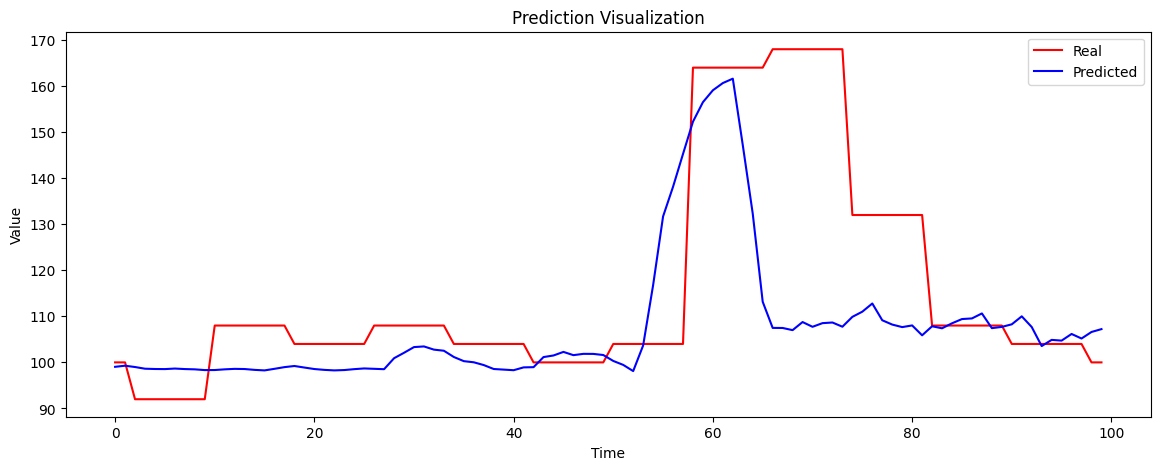

In [ ]:
import matplotlib.pyplot as plt

# Visualizing the results
plt.figure(figsize=(14,5))
plt.plot(y_test[:100], color = 'red', label = 'Real')
plt.plot(y_pred[:100], color = 'blue', label = 'Predicted')
plt.title('Prediction Visualization')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


Epoch 1/20
2127/2127 [==============================] - 11s 5ms/step - loss: 2.1335e-04
Epoch 2/20
2127/2127 [==============================] - 10s 5ms/step - loss: 1.0446e-04
Epoch 3/20
2127/2127 [==============================] - 10s 5ms/step - loss: 1.0131e-04
Epoch 4/20
2127/2127 [==============================] - 10s 5ms/step - loss: 9.0599e-05
Epoch 5/20
2127/2127 [==============================] - 11s 5ms/step - loss: 8.2995e-05
Epoch 6/20
2127/2127 [==============================] - 11s 5ms/step - loss: 8.0872e-05
Epoch 7/20
2127/2127 [==============================] - 10s 5ms/step - loss: 7.7535e-05
Epoch 8/20
2127/2127 [==============================] - 10s 5ms/step - loss: 7.1446e-05
Epoch 9/20
2127/2127 [==============================] - 11s 5ms/step - loss: 7.0675e-05
Epoch 10/20
2127/2127 [==============================] - 10s 5ms/step - loss: 6.7914e-05
Epoch 11/20
2127/2127 [==============================] - 10s 5ms/step - loss: 6.6785e-05
Epoch 12/20
2127/2127 [=======

/tmp/ipykernel_634322/1748273218.py:84: RuntimeWarning: divide by zero encountered in divide
  re = np.mean(np.abs((y_test_orig - y_pred_orig) / y_test_orig))


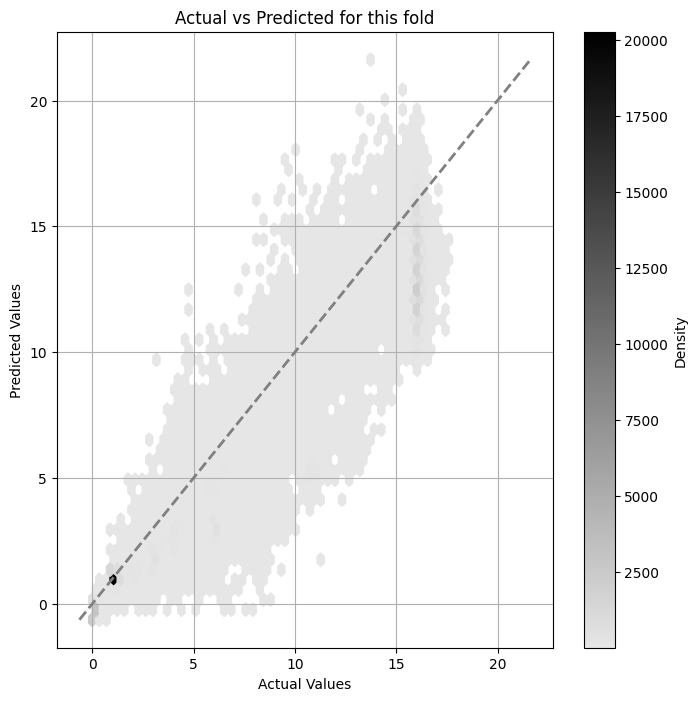

Epoch 1/20
4253/4253 [==============================] - 22s 5ms/step - loss: 1.2297e-04
Epoch 2/20
4253/4253 [==============================] - 21s 5ms/step - loss: 6.6141e-05
Epoch 3/20
4253/4253 [==============================] - 21s 5ms/step - loss: 6.1080e-05
Epoch 4/20
4253/4253 [==============================] - 21s 5ms/step - loss: 5.3431e-05
Epoch 5/20
4253/4253 [==============================] - 21s 5ms/step - loss: 5.2258e-05
Epoch 6/20
4253/4253 [==============================] - 19s 4ms/step - loss: 4.9277e-05
Epoch 7/20
4253/4253 [==============================] - 19s 4ms/step - loss: 4.7404e-05
Epoch 8/20
4253/4253 [==============================] - 20s 5ms/step - loss: 4.4415e-05
Epoch 9/20
4253/4253 [==============================] - 20s 5ms/step - loss: 4.1856e-05
Epoch 10/20
4253/4253 [==============================] - 21s 5ms/step - loss: 3.9686e-05
Epoch 11/20
4253/4253 [==============================] - 21s 5ms/step - loss: 3.8183e-05
Epoch 12/20
4253/4253 [=======

/tmp/ipykernel_634322/1748273218.py:84: RuntimeWarning: divide by zero encountered in divide
  re = np.mean(np.abs((y_test_orig - y_pred_orig) / y_test_orig))


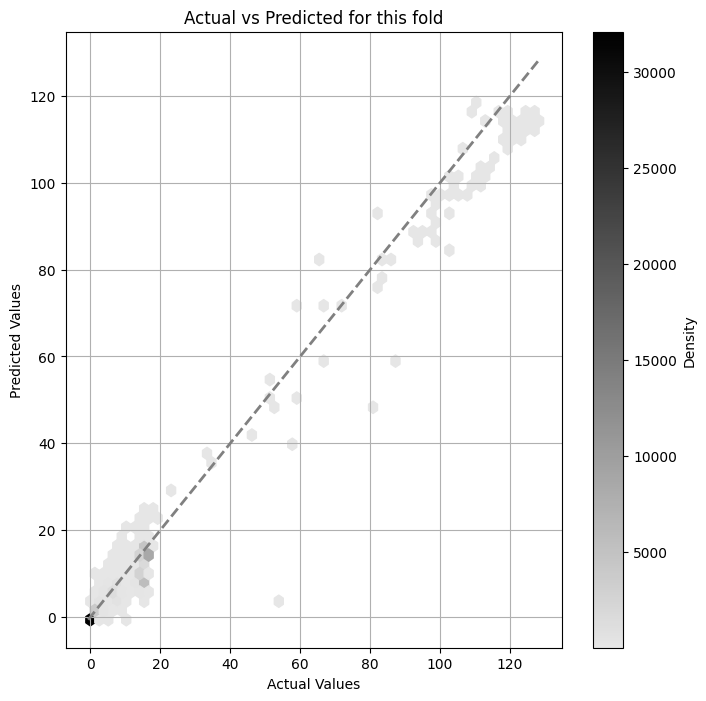

Epoch 1/20
6379/6379 [==============================] - 27s 4ms/step - loss: 9.9624e-05
Epoch 2/20
6379/6379 [==============================] - 27s 4ms/step - loss: 5.7123e-05
Epoch 3/20
6379/6379 [==============================] - 27s 4ms/step - loss: 4.6416e-05
Epoch 4/20
6379/6379 [==============================] - 26s 4ms/step - loss: 4.3718e-05
Epoch 5/20
6379/6379 [==============================] - 27s 4ms/step - loss: 3.9363e-05
Epoch 6/20
6379/6379 [==============================] - 27s 4ms/step - loss: 3.8364e-05
Epoch 7/20
6379/6379 [==============================] - 27s 4ms/step - loss: 3.7082e-05
Epoch 8/20
6379/6379 [==============================] - 26s 4ms/step - loss: 3.3258e-05
Epoch 9/20
6379/6379 [==============================] - 27s 4ms/step - loss: 3.2206e-05
Epoch 10/20
6379/6379 [==============================] - 27s 4ms/step - loss: 3.0822e-05
Epoch 11/20
6379/6379 [==============================] - 27s 4ms/step - loss: 3.1799e-05
Epoch 12/20
6379/6379 [=======

/tmp/ipykernel_634322/1748273218.py:84: RuntimeWarning: divide by zero encountered in divide
  re = np.mean(np.abs((y_test_orig - y_pred_orig) / y_test_orig))


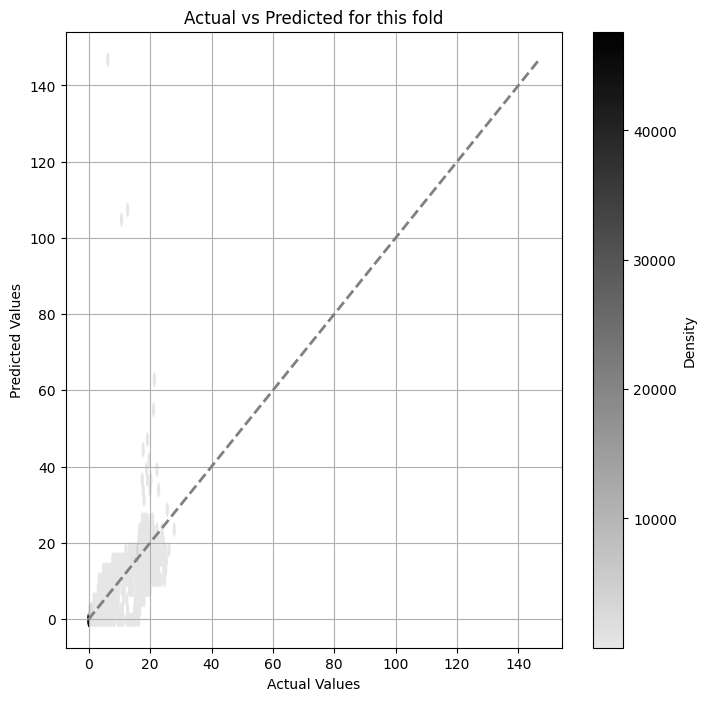

Epoch 1/20
8506/8506 [==============================] - 42s 5ms/step - loss: 7.7345e-05
Epoch 2/20
8506/8506 [==============================] - 41s 5ms/step - loss: 4.7050e-05
Epoch 3/20
8506/8506 [==============================] - 41s 5ms/step - loss: 3.8737e-05
Epoch 4/20
8506/8506 [==============================] - 41s 5ms/step - loss: 3.7297e-05
Epoch 5/20
8506/8506 [==============================] - 41s 5ms/step - loss: 3.3410e-05
Epoch 6/20
8506/8506 [==============================] - 41s 5ms/step - loss: 3.3618e-05
Epoch 7/20
8506/8506 [==============================] - 41s 5ms/step - loss: 2.9666e-05
Epoch 8/20
8506/8506 [==============================] - 41s 5ms/step - loss: 2.8908e-05
Epoch 9/20
8506/8506 [==============================] - 41s 5ms/step - loss: 2.7399e-05
Epoch 10/20
8506/8506 [==============================] - 41s 5ms/step - loss: 2.6865e-05
Epoch 11/20
8506/8506 [==============================] - 41s 5ms/step - loss: 2.7207e-05
Epoch 12/20
8506/8506 [=======

/tmp/ipykernel_634322/1748273218.py:84: RuntimeWarning: divide by zero encountered in divide
  re = np.mean(np.abs((y_test_orig - y_pred_orig) / y_test_orig))


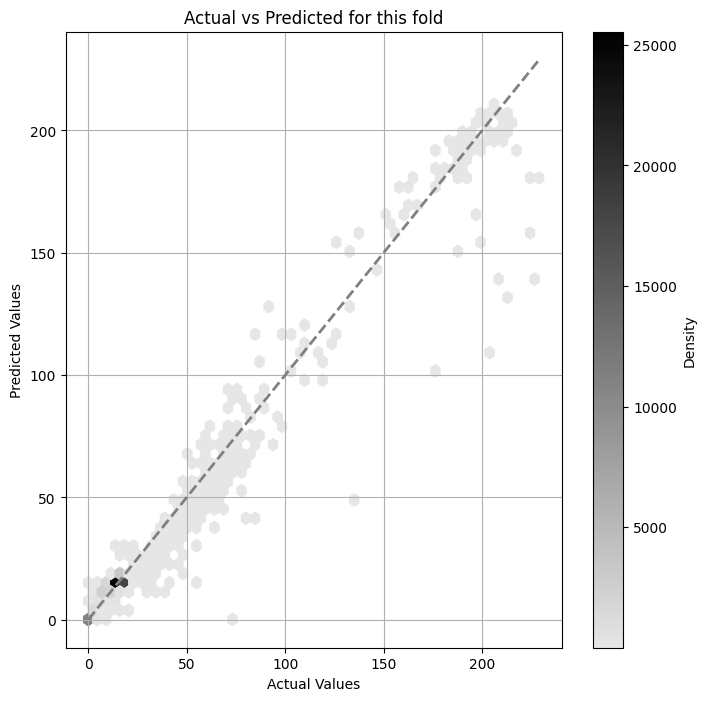

Epoch 1/20
10632/10632 [==============================] - 53s 5ms/step - loss: 8.1424e-05
Epoch 2/20
10632/10632 [==============================] - 52s 5ms/step - loss: 4.9787e-05
Epoch 3/20
10632/10632 [==============================] - 52s 5ms/step - loss: 4.0084e-05
Epoch 4/20
10632/10632 [==============================] - 52s 5ms/step - loss: 3.7397e-05
Epoch 5/20
10632/10632 [==============================] - 52s 5ms/step - loss: 3.3810e-05
Epoch 6/20
10632/10632 [==============================] - 52s 5ms/step - loss: 3.1974e-05
Epoch 7/20
10632/10632 [==============================] - 49s 5ms/step - loss: 3.0972e-05
Epoch 8/20
10632/10632 [==============================] - 50s 5ms/step - loss: 2.9358e-05
Epoch 9/20
10632/10632 [==============================] - 52s 5ms/step - loss: 3.0217e-05
Epoch 10/20
10632/10632 [==============================] - 52s 5ms/step - loss: 2.8416e-05
Epoch 11/20
10632/10632 [==============================] - 52s 5ms/step - loss: 2.7955e-05
Epoch 12

/tmp/ipykernel_634322/1748273218.py:84: RuntimeWarning: divide by zero encountered in divide
  re = np.mean(np.abs((y_test_orig - y_pred_orig) / y_test_orig))


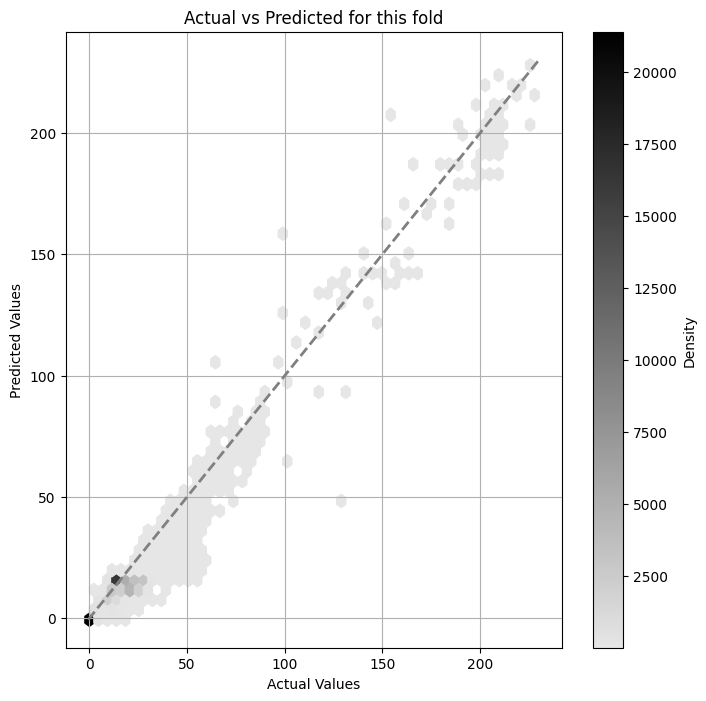

Mean RMSE over all splits:  2.7215767032283193
Mean RE over all splits:  inf


In [38]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch
import math
from sklearn.model_selection import train_test_split
import torch
from sklearn.preprocessing import MinMaxScaler
from torch.optim.lr_scheduler import ReduceLROnPlateau

column_job = ['node_netstat_Tcp_OutSegs','node_netstat_Tcp_RetransSegs','node_intr_total','node_netstat_Tcp_InSegs','node_procs_running','node_hwmon_temp_celsius-mean','node_network_transmit_bytes_total-sum','node_thermal_zone_temp-mean','node_arp_entries-sum','node_network_transmit_packets_total-sum','node_network_receive_bytes_total-sum','node_network_receive_packets_total-sum', 'TIMEOUT', 'COMPLETED',
       'CANCELLED', 'FAILED', 'OUT_OF_MEMORY', 'NODE_FAIL', 'jobCount_30s',
       'TIMEOUT_30s', 'COMPLETED_30s', 'CANCELLED_30s', 'FAILED_30s',
       'OUT_OF_MEMORY_30s', 'NODE_FAIL_30s','node_load1']
X = df[column_job]
y = df['node_load1']


def create_dataset_with_avg(X, y, time_steps=1, lags=4):
    Xs, ys = [], []
    
    # Convert y to numpy array if it's a list
    y_values = np.array(y) if isinstance(y, list) else y.values
    
    for i in range(len(X) - time_steps - lags + 1):
        v = X.iloc[i:(i + time_steps), :].values
        Xs.append(v)
        
        # Calculate the average of the next 4 lags for 'node_load1'
        avg_next_4_y = np.mean(y_values[i + time_steps:i + time_steps + lags])
        ys.append(avg_next_4_y)
    
    return np.array(Xs), np.array(ys)

sequence_length = 4


X_sequences, y_avg = create_dataset_with_avg(X, y, time_steps=sequence_length, lags=4)

# Scale X sequences using MinMaxScaler
scaler_X = MinMaxScaler()
X_sequences_scaled = scaler_X.fit_transform(X_sequences.reshape(-1, 26)).reshape(X_sequences.shape)

# Note: We're reshaping the sequences to 2D, scaling, and then reshaping back to 3D

# Split the scaled data
train_size = int(0.8 * len(X_sequences_scaled))
X_train, X_test = X_sequences_scaled[:train_size], X_sequences_scaled[train_size:]
y_train, y_test = y_avg[:train_size], y_avg[train_size:]

# Convert the datasets to PyTorch tensors
y_train_tensor, y_test_tensor = torch.Tensor(y_train).squeeze(), torch.Tensor(y_test).squeeze()
X_train_tensor = torch.Tensor(X_train.reshape(-1, sequence_length, 26)).squeeze()
X_test_tensor = torch.Tensor(X_test.reshape(-1, sequence_length, 26)).squeeze()

train_data, test_data = TensorDataset(X_train_tensor, y_train_tensor), TensorDataset(X_test_tensor, y_test_tensor)
train_loader, test_loader = DataLoader(train_data, batch_size=50, shuffle=True), DataLoader(test_data, batch_size=500)


class TransformerModel(nn.Module):
    def __init__(self, feature_size, hidden_size, nhead, num_layers, output_size=4):  # Set default output size to 4
        super(TransformerModel, self).__init__()
        self.model_type = 'Transformer'
        self.src_mask = None
        self.pos_encoder = PositionalEncoding(feature_size)
        encoder_layers = nn.TransformerEncoderLayer(feature_size, nhead, hidden_size)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layers, num_layers)
        self.decoder = nn.Linear(feature_size, output_size)  # Adjust the output size of the linear layer

    def _generate_square_subsequent_mask(self, sz):
        mask = (torch.triu(torch.ones(sz, sz)) == 1).transpose(0, 1)
        mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
        return mask

    def forward(self, src):
       device = src.device
       if self.src_mask is None or self.src_mask.size(0) != len(src):
           mask = self._generate_square_subsequent_mask(len(src)).to(device)
           self.src_mask = mask
       src = self.pos_encoder(src)
       output = self.transformer_encoder(src, self.src_mask)
       predictions = self.decoder(output[:, -1])  # Predicting the next 4 steps using the last encoder output
       # Average the predictions
       avg_prediction = predictions.mean(dim=1, keepdim=True)
       return avg_prediction


class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe)

    def forward(self, x):
        # Adjust the slicing of the positional encoding to the size of x
        x = x + self.pe[:x.size(1), :x.size(2)]
        return x







# feature_size = X_train.shape[1]
feature_size = 26
hidden_size = 512  # Example value, feel free to adjust
nhead = 2  # Make sure feature_size is divisible by nhead
num_layers = 4  # Example value

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = TransformerModel(feature_size, hidden_size, nhead, num_layers)
model = model.to(device)

# Define test batch size
test_batch_size = 500 


test_data = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_data, batch_size=test_batch_size)

criterion = torch.nn.MSELoss()


model = TransformerModel(feature_size, hidden_size, nhead, num_layers)
model = model.to(device)

# Initialize weights
for m in model.modules():
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        if m.bias is not None:
            nn.init.constant_(m.bias, 0.0)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Example learning rate


scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.9, patience=3, verbose=True)


train_losses = []
test_losses = []


num_epochs = 50  # Example epoch count

for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        
        optimizer.zero_grad()
        
        predictions = model(batch_X)
        loss = criterion(predictions, batch_y)
        loss.backward()
        
        optimizer.step()
        
        total_train_loss += loss.item()
        
    avg_train_loss = total_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Model Evaluation within the epoch loop
    model.eval()
    total_test_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)
            outputs = model(X_batch)
            mse_loss = criterion(outputs, y_batch)
            total_test_loss += mse_loss.item()
            
    avg_test_loss = total_test_loss / len(test_loader)
    test_losses.append(avg_test_loss)

    print(f"Epoch {epoch + 1}/{num_epochs}, Training Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}")

    scheduler.step(avg_test_loss)


all_predictions = []  # Initialize as empty list
all_targets = []  # Initialize as empty list

# Evaluation after all epochs
model.eval()
total_loss = 0
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        outputs = model(X_batch)
        all_predictions.append(outputs.cpu())
        all_targets.append(y_batch.cpu())
        mse_loss = criterion(outputs, y_batch)
        total_loss += mse_loss.item() * X_batch.size(0)

# Calculate average loss across all batches
avg_mse_loss = total_loss / len(test_loader.dataset)

# Calculate RMSE
rmse_loss = torch.sqrt(torch.tensor(avg_mse_loss))

print(f'Test RMSE Loss: {rmse_loss:.4f}')

# Concatenate all predictions and targets
all_predictions = torch.cat(all_predictions).numpy().reshape(-1, 1)
all_targets = torch.cat(all_targets).numpy().reshape(-1, 1)

# Since y is not scaled, we don't need to inverse transform. Directly convert to numpy arrays.
y_pred = np.squeeze(all_predictions)
y_test = np.squeeze(all_targets)

plt.figure(figsize=(10, 6))
plt.plot(train_losses, label="Training Loss", color="blue")
plt.plot(test_losses, label="Test Loss", color="red")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curve")
plt.show()


import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def plot_actual_vs_predicted(actual, predicted, title):
    plt.figure(figsize=(8, 8))
    
    # Custom colormap: start with lighter gray and progress to black
    colors = [(0.9, 0.9, 0.9), (0.6, 0.6, 0.6), (0.3, 0.3, 0.3), (0.0, 0.0, 0.0)]
    cmap_name = "custom_light_to_dark_gray"
    cm = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=256)

    # Hexbin plot with custom colormap
    hb = plt.hexbin(actual, predicted, gridsize=50, cmap=cm, mincnt=1)
    cb = plt.colorbar(hb)
    cb.set_label('Density')
    
    # Diagonal line
    max_val = max(actual.max(), predicted.max())
    min_val = min(actual.min(), predicted.min())
    plt.plot([min_val, max_val], [min_val, max_val], '--', color='gray', linewidth=2)  
    
    plt.title(title)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)

    plt.show()

# Check the type of all_predictions and all_targets
if isinstance(all_predictions, (list, tuple)):
    all_predictions = torch.cat(all_predictions).numpy().reshape(-1, 1)
    
if isinstance(all_targets, (list, tuple)):
    all_targets = torch.cat(all_targets).numpy().reshape(-1, 1)

# Convert to numpy arrays.
y_pred = np.squeeze(all_predictions)
y_test = np.squeeze(all_targets)

# Plotting
plot_actual_vs_predicted(y_test, y_pred, 'Actual vs Predicted for y1')
